GROUP 3 - PROJECT 1 - Exploring and identifying potential healthcare holes in Victoria

Research Question 4: Compare access to healthcare services and mortality rates (specifically the age-standardised deaths (per 100,000)) in Victoria from 2016 to 2020 based on data released by authorised/qualified government facilities.

Prepared by: Jalaj Sharma

Step 1:
Import all the dependencies for the jupyter notebook program and add some setup settings.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import hvplot.pandas
import scipy.stats as st

# Import the API key
from config import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

Step 2:
Read the mortality rates data from the excel file. The mortality rates excel file holds data on the various parameters to evaluate the mortality in Victoria from the years 2016 to 2020. The metrics are categorised into Local Government Areas (LGAs).
The metric of interest for the analysis is the age-standardised deaths (per 100,000) from 2016 to 2020.
The data is cleaned and the metric of interest is isolated into a data frame.
Finally, view the data to make sure it is clean and ready for analysis.

Side note: What is age standardised data?
<https://www.who.int/data/gho/indicator-metadata-registry/imr-details/78>
The numbers of deaths per 100 000 population are influenced by the age distribution of the population. Two populations with the same age-specific mortality rates for a particular cause of death will have different overall death rates if the age distributions of their populations are different. Age-standardized mortality rates adjust for differences in the age distribution of the population by applying the observed age-specific mortality rates for each population to a standard population.
The age-standardized mortality rate is a weighted average of the age-specific mortality rates per 100 000 persons, where the weights are the proportions of persons in the corresponding age groups of the WHO standard population.

In [3]:
# Geographical Data Source: https://www.aihw.gov.au/about-our-data/aihw-data-by-geography
# LGA Data source: https://www.aihw.gov.au/reports/life-expectancy-death/mort-books/contents/mort-books
# Read excel File
mort_xl_path = "Data\Q4_AIHW_LGA_MORT_2016-2020.xlsx"
mort_raw_df = pd.read_excel(mort_xl_path, sheet_name="LGA")

# Clean data: rename columns
mort_raw_df = mort_raw_df.rename(columns={"Persons": mort_raw_df.iloc[1,0],
                                    "Unnamed: 1": "LGA " + mort_raw_df.iloc[1,1],
                                    "Unnamed: 2": mort_raw_df.iloc[1,2],
                                    "Unnamed: 3": mort_raw_df.iloc[1,3],
                                    "Unnamed: 4": mort_raw_df.iloc[1,4],
                                    "Unnamed: 5": mort_raw_df.iloc[1,5],
                                    "Unnamed: 6": mort_raw_df.iloc[1,6],
                                    "Unnamed: 7": mort_raw_df.iloc[1,7],
                                    "Unnamed: 8": mort_raw_df.iloc[1,8],
                                    "Unnamed: 9": mort_raw_df.iloc[1,9],
                                    "Unnamed: 10": mort_raw_df.iloc[1,10],
                                    "Unnamed: 11": mort_raw_df.iloc[1,11],
                                    })

# https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
# Clean data: remove unnecessary rows
mort_raw_df.drop([0, 1], axis=0, inplace=True)

# Clean data: remove unnecessary columns
mort_raw_df.drop(["Reference", "Premature deaths", "Premature deaths (% of total deaths)", "Premature deaths age-standardised rate (per 100,000)"], axis=1, inplace=True)

# Clean data: reset the index to 0
mort_raw_df.reset_index(inplace=True)
mort_clean_df = mort_raw_df.drop(["index"], axis=1)

# Prepare data: extract data for 2020 and reset index
mort_clean_2020_df = mort_clean_df[mort_clean_df["Year"] == 2020].reset_index()
mort_clean_2020_df.drop(["index"], axis=1, inplace=True)

# Prepare data: extract data for 2019 and reset index
mort_clean_2019_df = mort_clean_df[mort_clean_df["Year"] == 2019].reset_index()
mort_clean_2019_df.drop(["index"], axis=1, inplace=True)

# Prepare data: extract data for 2018 and reset index
mort_clean_2018_df = mort_clean_df[mort_clean_df["Year"] == 2018].reset_index()
mort_clean_2018_df.drop(["index"], axis=1, inplace=True)

# Prepare data: extract data for 2017 and reset index
mort_clean_2017_df = mort_clean_df[mort_clean_df["Year"] == 2017].reset_index()
mort_clean_2017_df.drop(["index"], axis=1, inplace=True)

# Prepare data: extract data for 2017 and reset index
mort_clean_2016_df = mort_clean_df[mort_clean_df["Year"] == 2016].reset_index()
mort_clean_2016_df.drop(["index"], axis=1, inplace=True)

# Prepare data: extract "Age-standardised rate (per 100,000)" for 2016-2020
death_rate_2016_2020_df = pd.DataFrame({"LGA Name": mort_clean_df["LGA Name"].unique(),
                                        "Council Seat": mort_clean_df["Council Seat"].unique(),
                                        "2016": mort_clean_2016_df["Age-standardised rate (per 100,000)"],
                                        "2017": mort_clean_2017_df["Age-standardised rate (per 100,000)"],
                                        "2018": mort_clean_2018_df["Age-standardised rate (per 100,000)"],
                                        "2019": mort_clean_2019_df["Age-standardised rate (per 100,000)"],
                                        "2020": mort_clean_2020_df["Age-standardised rate (per 100,000)"]
                                        })

# View data: yearly age-standardised death rate (per 100,000) from 2016 to 2020
print(death_rate_2016_2020_df.to_string())

                    LGA Name     Council Seat       2016       2017       2018       2019       2020
0                 Alpine (S)           Bright  577.58725  605.61581  583.11752  661.90792  436.90781
1                Ararat (RC)           Ararat  600.02239  655.33077  540.50037  613.57958  479.59467
2               Ballarat (C)         Ballarat  585.72869  593.06919  561.19884  633.37889  559.05232
3                Banyule (C)          Ivanhoe  436.39145  462.37968  440.14928  506.36081  444.07029
4             Bass Coast (S)        Wonthaggi  515.42624  573.58395  539.76999  538.90156  512.18662
5                Baw Baw (S)         Warragul  530.12068  501.78193  520.52948   544.5596   538.8695
6                Bayside (C)      Sandringham  430.75811  421.84162   388.8283  432.89781  419.74013
7               Benalla (RC)          Benalla  573.28239   652.6398  565.98842  625.50367  585.29129
8             Boroondara (C)       Camberwell  429.60169  415.63379  387.67728  415.13123  

Step 3:
Read the hospital services data from the excel file. The hospital services excel file holds data on the reporting units active in Victoria from the years 2017 to 2020.
The metric of interest is the number of active reporting units in Victoria from 2017 to 2020. This will allow for seeing whether the number of active hospitals has changed over the years of interest.
The data is cleaned and the metric of interest is isolated into a data frame.

PLEASE NOTE: 2020 is the year of the Covid-19 pandemic and various stringent safety protocols were in place in Victoria. This will affect the data as atypical factors are in effect.

In [4]:
# Read excel File
# Data source: https://www.aihw.gov.au/reports-data/myhospitals/content/data-downloads?search=%7B%22SearchTerm%22:%22Hospital%20services%20data%20extract%22,%22ShowRelatedTopics%22:false%7D
reporting_units_xl_path = "Data\Q4_AIHW_Reporting_Units_2017_2020.xlsx"
reporting_units_raw_df = pd.read_excel(reporting_units_xl_path)

# Clean data: rename columns
reporting_units_raw_df = reporting_units_raw_df.rename(columns={"www.aihw.gov.au\nAustralian Institute of Health and Welfare\nGPO Box 570, Canberra ACT 2601, Australia": reporting_units_raw_df.iloc[7,0],
                                    "Unnamed: 1": reporting_units_raw_df.iloc[7,1],
                                    "Unnamed: 2": reporting_units_raw_df.iloc[7,2],
                                    "Unnamed: 3": reporting_units_raw_df.iloc[7,3],
                                    "Unnamed: 4": reporting_units_raw_df.iloc[7,4],
                                    "Unnamed: 5": reporting_units_raw_df.iloc[7,5]
                                    })

# https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
# Clean data: remove unnecessary rows
reporting_units_raw_df.drop([0,1,2,3,4,5,6,7], axis=0, inplace=True)

# Clean data: reset the index to 0
reporting_units_raw_df.reset_index(inplace=True)
reporting_units_clean_df = reporting_units_raw_df.drop(["index"], axis=1)

# Clean data: change focus to Victoria, Australia
reporting_units_VIC_clean_df = reporting_units_clean_df[reporting_units_clean_df["State"] == "Vic"]

# https://www.freecodecamp.org/news/how-to-substring-a-string-in-python/

# Prepare data: extract data for 2017-2020 in Victoria
reporting_units_VIC_2017_clean_df = reporting_units_VIC_clean_df[(reporting_units_VIC_clean_df["Time period"].str[:4] == "2017")]
reporting_units_VIC_2018_clean_df = reporting_units_VIC_clean_df[(reporting_units_VIC_clean_df["Time period"].str[:4] == "2018")]
reporting_units_VIC_2019_clean_df = reporting_units_VIC_clean_df[(reporting_units_VIC_clean_df["Time period"].str[:4] == "2019")]
reporting_units_VIC_2020_clean_df = reporting_units_VIC_clean_df[(reporting_units_VIC_clean_df["Time period"].str[:4] == "2020")]

# Prepare data: extract "Number of Reporting Units" for 2017-2020
num_reporting_units_VIC_2017 = len(reporting_units_VIC_2017_clean_df["Reporting unit"].unique())
num_reporting_units_VIC_2018 = len(reporting_units_VIC_2018_clean_df["Reporting unit"].unique())
num_reporting_units_VIC_2019 = len(reporting_units_VIC_2019_clean_df["Reporting unit"].unique())
num_reporting_units_VIC_2020 = len(reporting_units_VIC_2020_clean_df["Reporting unit"].unique())
num_reporting_units_VIC_2017_2020 = [num_reporting_units_VIC_2017, num_reporting_units_VIC_2018, num_reporting_units_VIC_2019, num_reporting_units_VIC_2020]

Step 4:
Plot a bar graph to visually show the number of active reporting units (hospitals) in Victoria from 2017 to 2020. This will illustrate whether the number of reporting units have changed drastically or not. If there has not been a significant change, we can make a crude assumption that the overall proximity of hospitals to the LGAs is the same over the years.

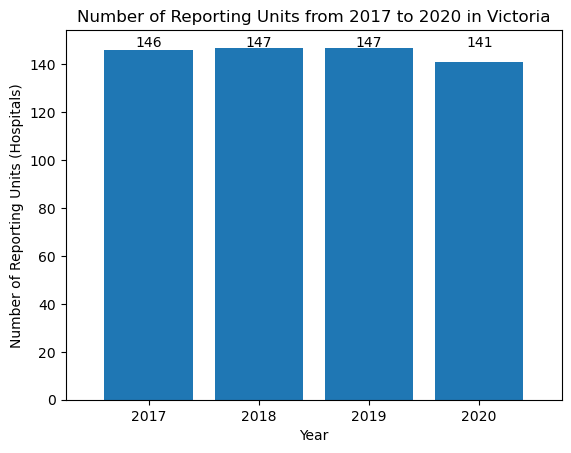

In [5]:
# Prepare axis: this is the x-axis for the years
years = [2017, 2018, 2019, 2020]

# Prepare axis: this is the y-axis for the number of reporting units
y_axis = num_reporting_units_VIC_2017_2020

# Plot: number of reporting units from 2017 to 2020
x_axis = np.arange(len(years))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years)
plt.title("Number of Reporting Units from 2017 to 2020 in Victoria")
plt.xlabel("Year")
plt.ylabel("Number of Reporting Units (Hospitals)")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.annotate(text=num_reporting_units_VIC_2017_2020[0], xy=(-0.12, 147.5))
plt.annotate(text=num_reporting_units_VIC_2017_2020[1], xy=(0.88, 147.5))
plt.annotate(text=num_reporting_units_VIC_2017_2020[2], xy=(1.88, 147.5))
plt.annotate(text=num_reporting_units_VIC_2017_2020[3], xy=(2.88, 147.5))
np_bar_graph = plt.bar(x_axis, y_axis, align="center")

From the bar plot (titled "Number of Reporting Units from 2017 to 2020 in Victoria"), a crude assumption is made that the overall proximity of hospitals to the LGAs is the same over the years of interest for the sake of data analysis. 

PLEASE NOTE: 2020 is the year of the Covid-19 pandemic and various stringent safety protocols were in place in Victoria. This will affect the data as atypical factors are in effect.

The Covid-19 pandemic would explain why there are lesser reporting units active in 2020.

Step 5:
Find the latitude and longitude data (geo-coordinates) for the LGAs of interest for the mortaility rates analysis.
Geoapify is used to query JSON messages and the geo-data is updated into the dataframe.

In [6]:
# Declare columns: for longitude and latitude data
death_rate_2016_2020_df["Latitude"] = ""
death_rate_2016_2020_df["Longitude"] = ""

# Declare parameters: for the API request
params = {
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

# Iterate through the death_rate_2016_2020_df DataFrame
for index, row in death_rate_2016_2020_df.iterrows():
    target_LGA = death_rate_2016_2020_df.loc[index, "Council Seat"]
    params["text"] = target_LGA + ", Victoria, Australia"

    long_lat_data_json = requests.get(base_url, params=params).json()

    try:
        death_rate_2016_2020_df.loc[index, "Longitude"] = long_lat_data_json["features"][0]["properties"]["lon"]
        death_rate_2016_2020_df.loc[index, "Latitude"] = long_lat_data_json["features"][0]["properties"]["lat"]
    except (KeyError, IndexError):
    # If no coordinates are found, set the geo-coordinates to NaN
        death_rate_2016_2020_df.loc[index, "Longitude"] = np.nan
        death_rate_2016_2020_df.loc[index, "Latitude"] = np.nan

# View data: yearly age-standardised deaths (per 100,000) from 2016 to 2020
print(death_rate_2016_2020_df.to_string())

                    LGA Name     Council Seat       2016       2017       2018       2019       2020   Latitude   Longitude
0                 Alpine (S)           Bright  577.58725  605.61581  583.11752  661.90792  436.90781 -36.728533  146.960772
1                Ararat (RC)           Ararat  600.02239  655.33077  540.50037  613.57958  479.59467 -37.284344  142.930621
2               Ballarat (C)         Ballarat  585.72869  593.06919  561.19884  633.37889  559.05232 -37.562303  143.860565
3                Banyule (C)          Ivanhoe  436.39145  462.37968  440.14928  506.36081  444.07029 -37.769031  145.043081
4             Bass Coast (S)        Wonthaggi  515.42624  573.58395  539.76999  538.90156  512.18662 -38.604366  145.591343
5                Baw Baw (S)         Warragul  530.12068  501.78193  520.52948   544.5596   538.8695 -38.158867  145.933629
6                Bayside (C)      Sandringham  430.75811  421.84162   388.8283  432.89781  419.74013 -37.953335  145.013931
7       

Step 6:
With the assumption that the number of hospital services is the same over the years of interest, we can use Geoapify again to determine the number of hospitals active within 25km of the LGAs and their council areas. This data (hosiptals in close proximity (<25km) to Victorian LGAs) then can be applied to all the years of interest for determining the relationship between age-standardised deaths (per 100,000) and access to hospitals.

In [7]:
# Declare columns: for number of hospitals count
death_rate_2016_2020_df["Hospitals Count"] = ""

# Declare parameters: for the API request for hospitals
categories = "healthcare.hospital"
radius = 25000 #25km radius

# Set parameters: for the type of search
limit = 200

# Set parameters: dictionary of parameters
params = {
    "categories":categories,
    "limit": limit,
    "apiKey":geoapify_key    
}

# Set URL: base address
base_url = "https://api.geoapify.com/v2/places"


# Iterate: through the death_rate_2016_2020_df DataFrame
for index, row in death_rate_2016_2020_df.iterrows():
    latitude_LGA = death_rate_2016_2020_df.loc[index, "Latitude"]
    longitude_LGA = death_rate_2016_2020_df.loc[index, "Longitude"]
    params["filter"] = f"circle:{longitude_LGA},{latitude_LGA},{radius}"
    params["bias"] = f"proximity:{longitude_LGA},{latitude_LGA}"

    num_hospitals_data_json = requests.get(base_url, params=params).json()

    try:
        death_rate_2016_2020_df.loc[index, "Hospitals Count"] = len(num_hospitals_data_json["features"])
    except (KeyError, IndexError):
    # If no hospital is found, set the count to NaN
        death_rate_2016_2020_df.loc[index, "Hospitals Count"] = np.nan

print(death_rate_2016_2020_df.to_string())

                    LGA Name     Council Seat       2016       2017       2018       2019       2020   Latitude   Longitude Hospitals Count
0                 Alpine (S)           Bright  577.58725  605.61581  583.11752  661.90792  436.90781 -36.728533  146.960772               3
1                Ararat (RC)           Ararat  600.02239  655.33077  540.50037  613.57958  479.59467 -37.284344  142.930621               1
2               Ballarat (C)         Ballarat  585.72869  593.06919  561.19884  633.37889  559.05232 -37.562303  143.860565               7
3                Banyule (C)          Ivanhoe  436.39145  462.37968  440.14928  506.36081  444.07029 -37.769031  145.043081             117
4             Bass Coast (S)        Wonthaggi  515.42624  573.58395  539.76999  538.90156  512.18662 -38.604366  145.591343               2
5                Baw Baw (S)         Warragul  530.12068  501.78193  520.52948   544.5596   538.8695 -38.158867  145.933629               2
6                Bay

Step 7:
Create a boxplot of the age-standardised deaths (per 100,000) across the years to compare the distributions.

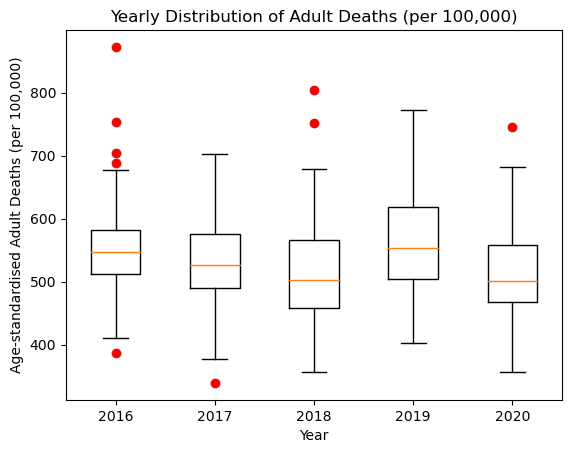

In [8]:
# Plot: boxplots of the age-standardised deaths (per 100,000) for 2016-2022
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Age-standardised Adult Deaths (per 100,000)")
ax1.set_xlabel("Year")
ax1.set_title("Yearly Distribution of Adult Deaths (per 100,000)")
ax1.set_xticklabels(["2016", "2017", "2018", "2019", "2020"])
ax1.boxplot([death_rate_2016_2020_df["2016"], death_rate_2016_2020_df["2017"], death_rate_2016_2020_df["2018"], death_rate_2016_2020_df["2019"], death_rate_2016_2020_df["2020"]], 0, 'ro')
plt.show()  

Looking at the box plot above, a number of observations can be made:

    1. All box plots are within the 450-650 adult deaths (per 100,000) range suggesting some consistency in the data, especially the medians being within 500-600.
    
    2. There are outliers and the box spread is differently across the years meaning the data is not exactly the same, although there are similarities. This is expected becuase factors change with time.

    3. There isn't any high degree of skewness in the data

    4. As the box plot are not vastly different, the data is comparable with one another.

Step 8:
With all the data collected and prepared, we can now do some analysis.
For the year 2016, we can calulate the correlation between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000). This quantifies the relationship.
Furthermore, a scatter plot can be created to qualitatively assess the relationship between the two variables of interest.

The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2016 is -0.61019


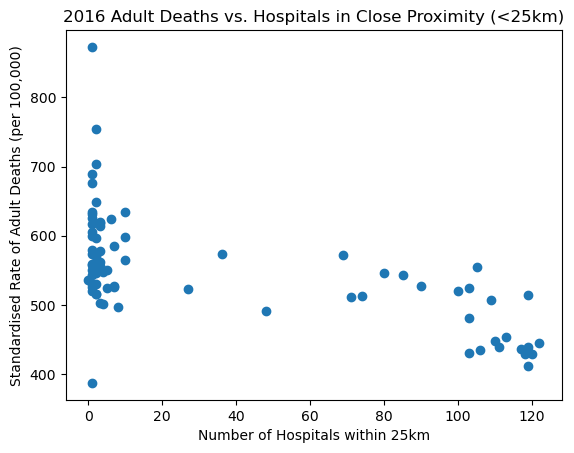

In [9]:
# Generate a scatter plot of Hospitals Count vs. Age-Standardised Adult Deaths (per 100,000)
y_axis = death_rate_2016_2020_df["2016"]
x_axis = death_rate_2016_2020_df["Hospitals Count"]

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef_2016 = (round(st.pearsonr(x_axis,y_axis)[0],5))
print(f"The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2016 is {corr_coef_2016}")

plt.scatter(x_axis, y_axis, marker="o")
plt.title("2016 Adult Deaths vs. Hospitals in Close Proximity (<25km)")
plt.xlabel("Number of Hospitals within 25km")
plt.ylabel("Standardised Rate of Adult Deaths (per 100,000)")
plt.show()

It can be seen from the correlation value for 2016, that there is an inverse relationship between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000), as denoted by the negative value. The value of about -0.61 shows that the inverse relationship is prevalent.
Similarly, looking at the scatter plot labelled "2016 Adult Deaths vs. Hospitals in Close Proximity (<25km)", the age-standardised deaths (per 100,000) is typically 500 or more. But as the number of hospitals within 25km increases to beyond 90, there is a shift in the deaths (per 100,000) to less than 500.

Step 9:
Do the same as step 8, but for the year 2017.

The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2017 is -0.54773


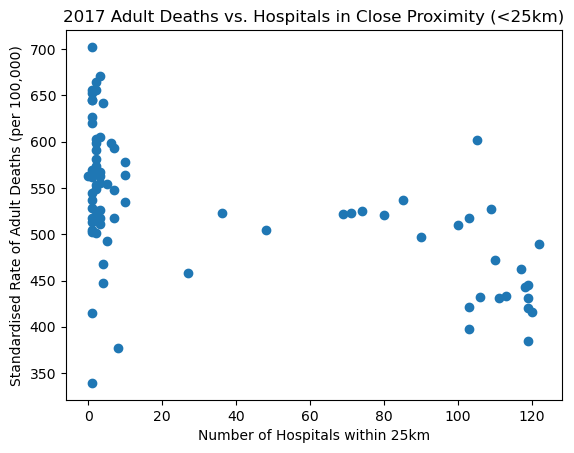

In [10]:
# Generate a scatter plot of Hospitals Count vs. Age-Standardised Adult Deaths (per 100,000)
y_axis = death_rate_2016_2020_df["2017"]
x_axis = death_rate_2016_2020_df["Hospitals Count"]

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef_2017 = (round(st.pearsonr(x_axis,y_axis)[0],5))
print(f"The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2017 is {corr_coef_2017}")

plt.scatter(x_axis, y_axis, marker="o")
plt.title("2017 Adult Deaths vs. Hospitals in Close Proximity (<25km)")
plt.xlabel("Number of Hospitals within 25km")
plt.ylabel("Standardised Rate of Adult Deaths (per 100,000)")
plt.show()

The results for 2017 are similar to 2016.
It can be seen from the correlation value for 2017, that there is an inverse relationship between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000), as denoted by the negative value. The value of about -0.55 shows that the inverse relationship is prevalent.
Similarly, looking at the scatter plot labelled "2017 Adult Deaths vs. Hospitals in Close Proximity (<25km)", the age-standardised deaths (per 100,000) is typically 500 or more. But as the number of hospitals within 25km increases to beyond 90, there is a shift in the deaths (per 100,000) to less than 500.

Step 10:
Do the same as Step 8, but for the year 2018.

The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2018 is -0.6709


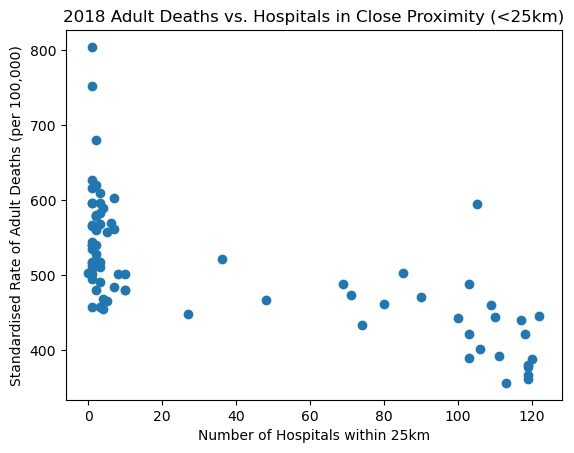

In [11]:
# Generate a scatter plot of Hospitals Count vs. Age-Standardised Adult Deaths (per 100,000)
y_axis = death_rate_2016_2020_df["2018"]
x_axis = death_rate_2016_2020_df["Hospitals Count"]

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef_2018 = (round(st.pearsonr(x_axis,y_axis)[0],5))
print(f"The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2018 is {corr_coef_2018}")

plt.scatter(x_axis, y_axis, marker="o")
plt.title("2018 Adult Deaths vs. Hospitals in Close Proximity (<25km)")
plt.xlabel("Number of Hospitals within 25km")
plt.ylabel("Standardised Rate of Adult Deaths (per 100,000)")
plt.show()

The results for 2018 are similar to 2016 and 2017.
It can be seen from the correlation value for 2018, that there is an inverse relationship between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000), as denoted by the negative value. The value of about -0.67 shows that the inverse relationship is prevalent.
Similarly, looking at the scatter plot labelled "2018 Adult Deaths vs. Hospitals in Close Proximity (<25km)", the age-standardised deaths (per 100,000) is typically 450 or more. But as the number of hospitals within 25km increases to beyond 100, there is a shift in the deaths (per 100,000) to less than 450.

Step 11:
Do the same as Step 8, but for the year 2019.

The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2019 is -0.61255


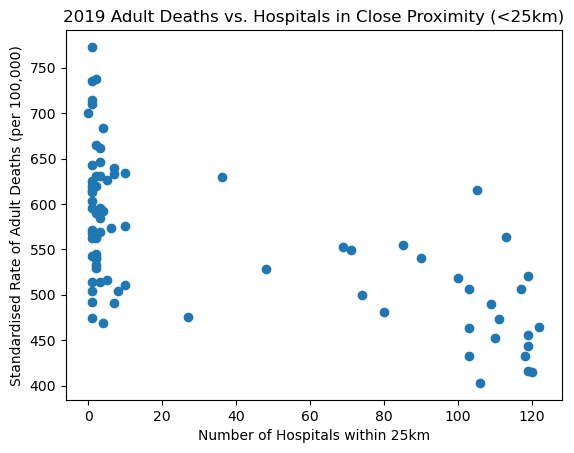

In [12]:
# Generate a scatter plot of Hospitals Count vs. Age-Standardised Adult Deaths (per 100,000)
y_axis = death_rate_2016_2020_df["2019"]
x_axis = death_rate_2016_2020_df["Hospitals Count"]

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef_2019 = (round(st.pearsonr(x_axis,y_axis)[0],5))
print(f"The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2019 is {corr_coef_2019}")

plt.scatter(x_axis, y_axis, marker="o")
plt.title("2019 Adult Deaths vs. Hospitals in Close Proximity (<25km)")
plt.xlabel("Number of Hospitals within 25km")
plt.ylabel("Standardised Rate of Adult Deaths (per 100,000)")
plt.show()

The results for 2019 are similar to 2016, 2017, and 2018.
It can be seen from the correlation value for 2019, that there is an inverse relationship between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000), as denoted by the negative value. The value of about -0.61 shows that the inverse relationship is prevalent.
Similarly, looking at the scatter plot labelled "2019 Adult Deaths vs. Hospitals in Close Proximity (<25km)", the age-standardised deaths (per 100,000) is typically 450 or more. But as the number of hospitals within 25km increases to beyond 100, there is a shift in the deaths (per 100,000) to less than 450.

Step 12:
Do the same as Step 8, but for the year 2020.

The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2020 is -0.62465


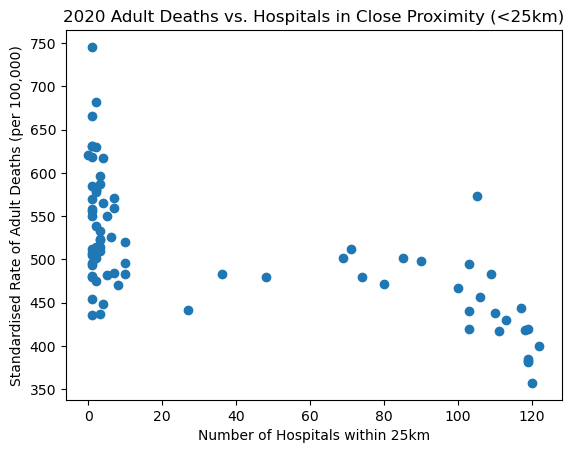

In [13]:
# Generate a scatter plot of Hospitals Count vs. Age-Standardised Adult Deaths (per 100,000)
y_axis = death_rate_2016_2020_df["2020"]
x_axis = death_rate_2016_2020_df["Hospitals Count"]

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef_2020 = (round(st.pearsonr(x_axis,y_axis)[0],5))
print(f"The correlation between nearby hospitals and age standardised adult death rate (per 100,00) for 2020 is {corr_coef_2020}")

plt.scatter(x_axis, y_axis, marker="o")
plt.title("2020 Adult Deaths vs. Hospitals in Close Proximity (<25km)")
plt.xlabel("Number of Hospitals within 25km")
plt.ylabel("Standardised Rate of Adult Deaths (per 100,000)")
plt.show()

The results for 2020 are similar to 2016, 2017, 2018, and 2019.
It can be seen from the correlation value for 2020, that there is an inverse relationship between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000), as denoted by the negative value. The value of about -0.62 shows that the inverse relationship is prevalent.
Similarly, looking at the scatter plot labelled "2020 Adult Deaths vs. Hospitals in Close Proximity (<25km)", the age-standardised deaths (per 100,000) is typically 430 or more. But as the number of hospitals within 25km increases to beyond 100, there is a shift in the deaths (per 100,000) to less than 430.

Step 13:
Plot a bar graph to visually show the correlation between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000) for the years of interest. This will illustrate the relationship between the variables being investigated over the years. Finally, an average correlation can be computed to conclude the relationship based on the data over the years.

Average correlation between adult deaths (per 100,000) and hospitals in close proximity (<25km) for the years 2016 to 2020: -0.613204


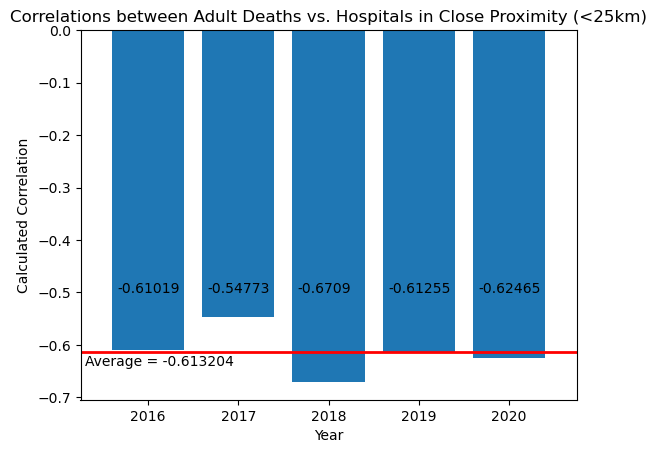

In [14]:
# Prepare axis: this is the x-axis for the years
years = [2016, 2017, 2018, 2019, 2020]

# Prepare axis: this is the y-axis for the correlations (hospital access vs. mortality)
yearly_corr = [corr_coef_2016, corr_coef_2017, corr_coef_2018, corr_coef_2019, corr_coef_2020]
y_axis = yearly_corr

# Calculate: mean for displaying on the chart
mean_corr = np.mean(yearly_corr)

print(f"Average correlation between adult deaths (per 100,000) and hospitals in close proximity (<25km) for the years 2016 to 2020: {mean_corr}")

# Plot: correlations from 2016 to 2020
x_axis = np.arange(len(years))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years)
plt.title("Correlations between Adult Deaths vs. Hospitals in Close Proximity (<25km)")
plt.xlabel("Year")
plt.ylabel("Calculated Correlation")
plt.axhline(y=mean_corr, color= 'red', linewidth=2)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.annotate(text=yearly_corr[0], xy=(-0.34, -0.5))
plt.annotate(text=yearly_corr[1], xy=(0.66, -0.5))
plt.annotate(text=yearly_corr[2], xy=(1.66, -0.5))
plt.annotate(text=yearly_corr[3], xy=(2.66, -0.5))
plt.annotate(text=yearly_corr[4], xy=(3.66, -0.5))
plt.annotate(text="Average = " + str(mean_corr), xy=(-0.7, -0.64))

np_bar_graph = plt.bar(x_axis, y_axis, align="center")

With the correlations calculated/plotted for the relationship between hospitals in close proximity (<25km) to LGAs vs. age-standardised deaths (per 100,000), yearly (2016 - 2020) and the average across those years, it can be concluded with a high degree of certainty that an inverse realtionship exists. In other words, as the number of hospitals in close access increases, the number of deaths in the population (per 100,000) decreases.

Step 14 (Extra):
Plot the LGAs on a map. This will show the remoteness of some of the areas.

In [17]:
# Configure the map plot_1
map_plot_1 = death_rate_2016_2020_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "Council Seat"
)

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Council Seat)